In [2]:
from datetime import datetime
import numpy as np             
import pandas as pd           
import matplotlib.pylab as plt 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_squared_error, mean_absolute_error, get_scorer
%matplotlib inline         

In [3]:
df = pd.read_csv("./data_files/FootTrafficWeatherMelb2_20130101_20220701_v3.csv")
df.head()

,date,total_people,total_rain,rain_quality,max_temp,max_temp_quality,min_temp,min_temp_quality,solar_exp,WeekDay,population_annual,population_change_annual,is_holiday,is_lockdown,OfflineRetail_Original_Turnover,OfflineRetail_Seasonally_Adjusted_Turnover,OfflineRetail_Trend_Turnover
0,2022-07-31,327383.0,0.0,N,14.7,Y,4.3,Y,4.8,6,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
1,2022-07-30,462115.0,0.0,N,13.0,Y,2.1,Y,11.3,5,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
2,2022-07-29,405511.0,1.0,N,12.7,Y,6.5,Y,11.2,4,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
3,2022-07-28,334858.0,1.0,N,13.2,Y,9.3,Y,9.3,3,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
4,2022-07-27,340569.0,3.0,N,15.3,Y,9.3,Y,7.7,2,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN


In [55]:
df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True) #convert from string to datetime
df1 = df.set_index(['date'])
df1.head(5)

,total_people,total_rain,rain_quality,max_temp,max_temp_quality,min_temp,min_temp_quality,solar_exp,WeekDay,population_annual,population_change_annual,is_holiday,is_lockdown,OfflineRetail_Original_Turnover,OfflineRetail_Seasonally_Adjusted_Turnover,OfflineRetail_Trend_Turnover
date,,,,,,,,,,,,,,,,
2022-07-31,327383.0,0.0,N,14.7,Y,4.3,Y,4.8,6,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
2022-07-30,462115.0,0.0,N,13.0,Y,2.1,Y,11.3,5,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
2022-07-29,405511.0,1.0,N,12.7,Y,6.5,Y,11.2,4,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
2022-07-28,334858.0,1.0,N,13.2,Y,9.3,Y,9.3,3,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
2022-07-27,340569.0,3.0,N,15.3,Y,9.3,Y,7.7,2,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN


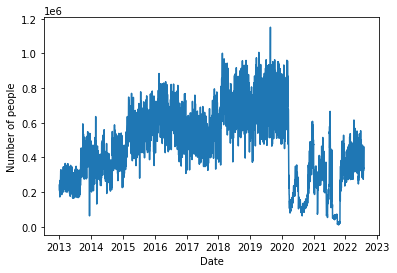

In [41]:
idx_df = df1[['total_people']]
plt.xlabel('Date')
plt.ylabel('Number of people')
plt.plot(idx_df)

             total_people
date                     
2022-07-31            NaN
2022-07-30            NaN
2022-07-29            NaN
2022-07-28            NaN
2022-07-27            NaN
...                   ...
2013-01-05  247226.750000
2013-01-04  236431.083333
2013-01-03  230550.083333
2013-01-02  227727.416667
2013-01-01  227930.083333

[3499 rows x 1 columns]             total_people
date                    
2022-07-31           NaN
2022-07-30           NaN
2022-07-29           NaN
2022-07-28           NaN
2022-07-27           NaN
...                  ...
2013-01-05  44356.949772
2013-01-04  40090.550822
2013-01-03  35362.940163
2013-01-02  32468.470372
2013-01-01  32355.518696

[3499 rows x 1 columns]


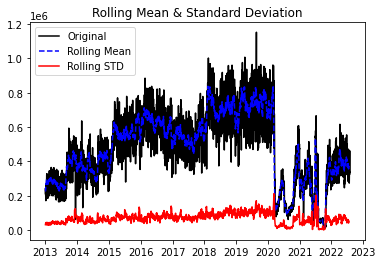

In [50]:
rolmean = idx_df.rolling(window=12).mean() 
rolstd = idx_df.rolling(window=12).std()
print(rolmean,rolstd)

# rolling statistics for trend spotting

orig = plt.plot(idx_df, color='black', label='Original')
mean = plt.plot(rolmean, color='blue', label='Rolling Mean', linestyle='dashed')
std = plt.plot(rolstd, color='red', label='Rolling STD')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

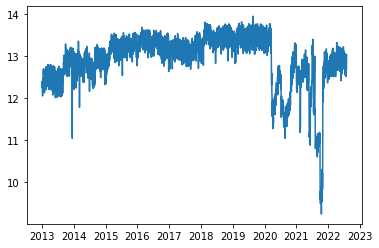

In [51]:
#estimating trend

idx_df_logScale = np.log(idx_df)
plt.plot(idx_df_logScale)

In [4]:
df

,date,total_people,total_rain,rain_quality,max_temp,max_temp_quality,min_temp,min_temp_quality,solar_exp,WeekDay,population_annual,population_change_annual,is_holiday,is_lockdown,OfflineRetail_Original_Turnover,OfflineRetail_Seasonally_Adjusted_Turnover,OfflineRetail_Trend_Turnover
0,2022-07-31,327383.0,0.0,N,14.7,Y,4.3,Y,4.8,6,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
1,2022-07-30,462115.0,0.0,N,13.0,Y,2.1,Y,11.3,5,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
2,2022-07-29,405511.0,1.0,N,12.7,Y,6.5,Y,11.2,4,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
3,2022-07-28,334858.0,1.0,N,13.2,Y,9.3,Y,9.3,3,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
4,2022-07-27,340569.0,3.0,N,15.3,Y,9.3,Y,7.7,2,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,2013-01-05,195376.0,NaN,NaN,NaN,NaN,NaN,NaN,30.5,5,4217000,2.50,NaN,NaN,5274.0,5364.9,5362.4
3495,2013-01-04,192351.0,NaN,NaN,NaN,NaN,NaN,NaN,33.5,4,4217000,2.50,NaN,NaN,5274.0,5364.9,5362.4
3496,2013-01-03,226005.0,NaN,NaN,NaN,NaN,NaN,NaN,32.8,3,4217000,2.50,NaN,NaN,5274.0,5364.9,5362.4
3497,2013-01-02,244083.0,NaN,NaN,NaN,NaN,NaN,NaN,31.9,2,4217000,2.50,NaN,NaN,5274.0,5364.9,5362.4


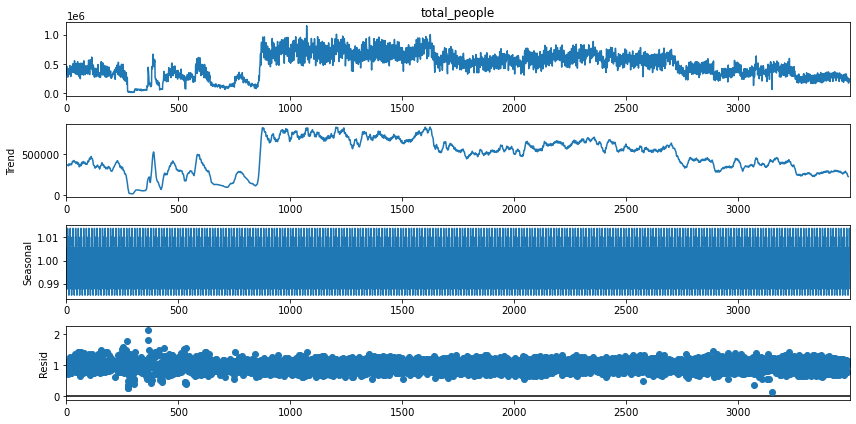

In [9]:
# decompose the time series

plt.rcParams["figure.figsize"] = (12,6)
result = seasonal_decompose(df['total_people'], model='multiplicative', period = 12)
result.plot()
plt.show()

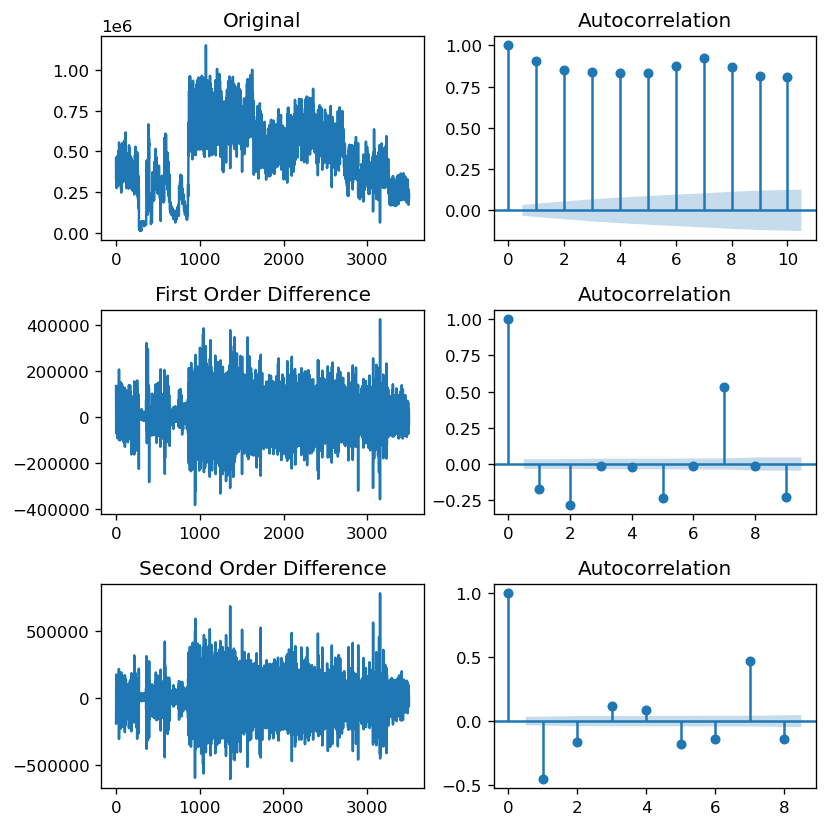

In [12]:
# non-seasonal  - best one will be the one with lowest sd

def auto_correlation(df, prefix, lags):
    plt.rcParams.update({'figure.figsize':(7,7), 'figure.dpi':120})
    
    # define the plot grid
    fig, axes = plt.subplots(3,2, sharex=False)

    # first Difference
    axes[0, 0].plot(df)
    axes[0, 0].set_title('Original' + prefix)
    plot_acf(df, lags=lags, ax=axes[0, 1])

    # first Difference
    df_first_diff = df.diff().dropna()
    axes[1, 0].plot(df_first_diff)
    axes[1, 0].set_title('First Order Difference' + prefix)
    plot_acf(df_first_diff, lags=lags - 1, ax=axes[1, 1])

    # second Difference
    df_second_diff = df.diff().diff().dropna()
    axes[2, 0].plot(df_second_diff)
    axes[2, 0].set_title('Second Order Difference' + prefix)
    plot_acf(df_second_diff, lags=lags - 2, ax=axes[2, 1])
    plt.tight_layout()
    plt.show()
    
auto_correlation(df['total_people'], '', 10)

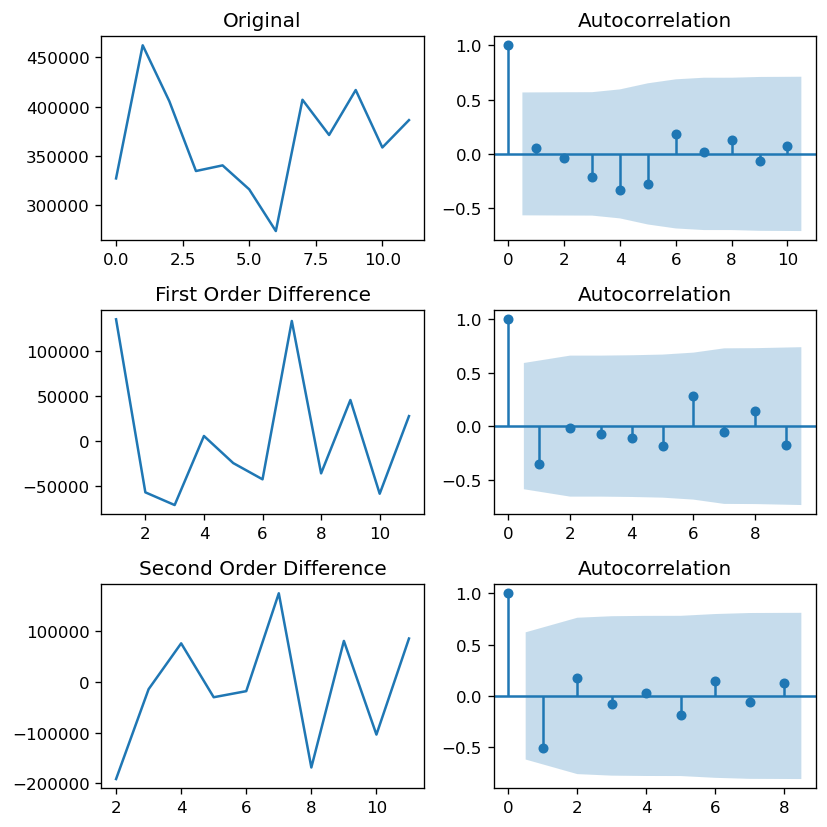

In [63]:
# seasonal

df_s_people = df['total_people'][0:12]

# autocorrelation 

auto_correlation(df_s_people, '', 10)

In [16]:
pred_periods = 30
split_number = df['total_people'].count() - pred_periods # corresponds to a prediction span of 2&5 years
df_train = pd.DataFrame(df['total_people'][:split_number]).rename(columns={'total_people':'y_train'})
df_test = pd.DataFrame(df['total_people'][split_number:]).rename(columns={'total_people':'y_test'})

model = pm.auto_arima(df.total_people, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_d=3, max_q=3, # set a maximum p and q value
                      m=1,              # frequency of series
                      d=None,           
                      seasonal=True,   # No Seasonality
                      start_P=0,  # max_P=3, max_D=2, max_Q=3,
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=88871.447, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=89731.342, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=89626.774, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=89211.146, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=89729.343, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=88700.543, Time=0.77 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=89240.717, Time=0.33 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=88696.901, Time=1.29 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=89154.815, Time=0.47 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=88688.409, Time=4.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=88516.465, Time=2.93 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=88709.210, Time=0.93 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=87944.784, Time=7.41 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=88682.454, Time=3.16 sec
 ARIMA(3,1,3)(0,0,0

In [55]:
test_pred = model.predict(n_periods=pred_periods, dynamic=False) # period in bulk 2&5 years
df_test['y_test_pred'] = test_pred
df_union = pd.concat([df_train, df_test])

test_value = df_union[3469:]
rmse = mean_squared_error(test_value['y_test'], test_value['y_test_pred'], squared=False)
rmse

76976.09869748361